In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
cols = ['Results','Latitude','Longitude']
rest = pd.read_csv('data/Food_Inspections.csv', usecols=cols)

Eliminamos los registros sin coordenadas completas

In [7]:
rest = rest.dropna(subset=['Latitude'])
rest = rest.dropna(subset=['Longitude'])

Número de registros

In [9]:
len(rest)

214316

In [10]:
rest.Results.unique()

array(['Pass', 'Fail', 'No Entry', 'Out of Business', 'Not Ready',
       'Pass w/ Conditions', 'Business Not Located'], dtype=object)

Filtramos únicamente aquellos registros que pasaron o no pasaron la prueba

In [11]:
passed = rest[rest['Results']=='Pass']
failed = rest[rest['Results']=='Fail']

In [12]:
len(passed), len(failed)

(112170, 41361)

Imagen de la ciudad de chicago

In [7]:
chicago = plt.imread('data/chicago.png')

In [8]:
boundires = ((rest.Longitude.min(),   rest.Longitude.max(),      
         rest.Latitude.min(), rest.Latitude.max()))

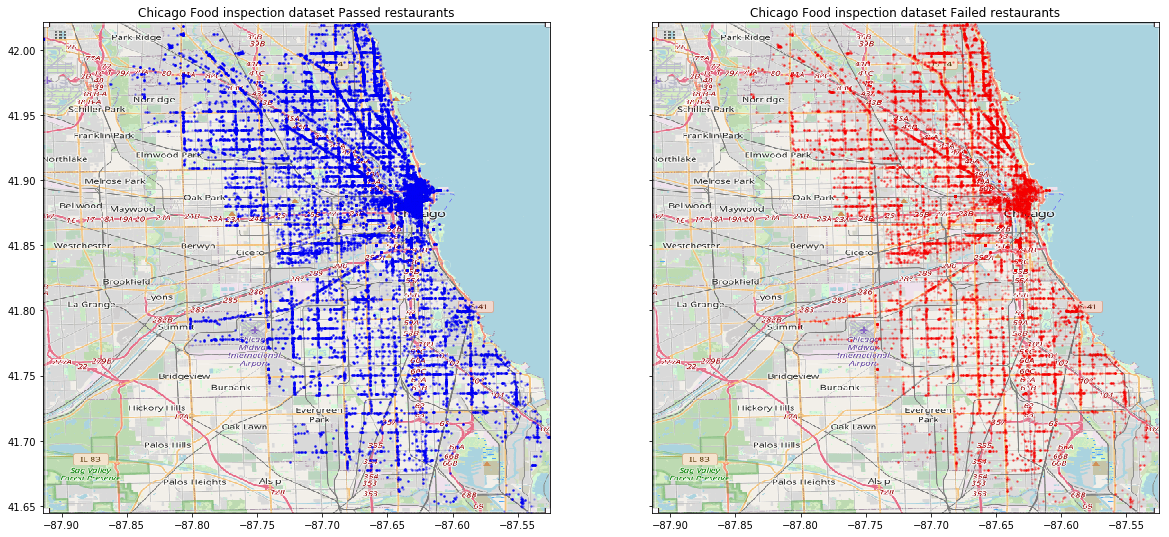

In [9]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize = (20,20))

ax[0].scatter(passed.Longitude, passed.Latitude, zorder=2, alpha=0.1, c='b', s=2)
ax[0].imshow(chicago, zorder=0, extent=boundires, aspect='equal')
ax[0].title.set_text('Chicago Food inspection dataset Passed restaurants')

ax[1].scatter(failed.Longitude, failed.Latitude, zorder=2, alpha=0.1, c='r', s=2)
ax[1].imshow(chicago, zorder=0, extent=boundires, aspect='equal')
ax[1].title.set_text('Chicago Food inspection dataset Failed restaurants')

plt.show()